In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import glob
glob.glob("data/*")

['data/범죄자_범행동기_20220602183738.csv',
 'data/범죄자_범행동기_및_기간_2011_2020.csv',
 'data/카카오뱅크_323410_2022.05.18.csv',
 'data/krx.csv',
 'data/국민건강보험공단_건강검진정보_20211229.CSV',
 'data/범죄자_범행동기_2011_2020.csv',
 'data/AIR_HOUR_2021.csv',
 'data/etf_2022-05-23_raw.csv',
 'data/crime_final.csv',
 'data/news_005930_삼성전자.csv',
 'data/국민건강보험공단_의약품처방정보_20211229',
 'data/범죄자_공범관계_2011_2020.csv',
 'data/SE4DA02 0519 음식특성 - 매운맛.csv',
 'data/HP_T60_2020_1.CSV',
 'data/HP_T60_2020_2.CSV',
 'data/HP_T60_2020_3.CSV',
 'data/범죄자_생활정도__혼인관계_및_부모관계_20220602182104.csv',
 'data/135_DT_13501N_A042_20220531195702.csv',
 'data/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20210930.csv',
 'data/news_373220_LG에너지솔루션_2022.05.17.csv',
 'data/bidding_list.csv',
 'data/범죄자_공범관계_20220602184144.csv',
 'data/seoul-120-sample.csv',
 'data/135_DT_13501N_A039_20220531203023.csv',
 'data/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv',
 'data/kosis-cancer-raw.csv',
 'data/seoul-120-list.csv',
 'data/seoul-covid19-2021-12-26.csv',
 

In [3]:
df=pd.read_csv("data/crime_final.csv")

In [4]:
df.shape

(374, 6)

In [5]:
df.head(10)

,연도,범죄명,자백발생횟수,재범발생횟수,공범자수,마약소지
0,2011,강간·강제추행,17652,8324,0,14
1,2011,강도,4890,3230,0,12
2,2011,공갈,3786,1949,0,5
3,2011,교통범죄,524350,253502,0,82
4,2011,기타범죄,224781,111959,0,102
5,2011,노동범죄,2641,1612,0,0
6,2011,도박범죄,46174,31382,0,27
7,2011,마약범죄,5409,3382,0,2947
8,2011,문서·인장,22105,5817,0,12
9,2011,방화,1519,977,0,0


In [6]:
df.dtypes

연도         int64
범죄명       object
자백발생횟수     int64
재범발생횟수     int64
공범자수       int64
마약소지       int64
dtype: object

In [7]:
df["범죄명"].unique()

array(['강간·강제추행', '강도', '공갈', '교통범죄', '기타범죄', '노동범죄', '도박범죄', '마약범죄',
       '문서·인장', '방화', '배임', '병역범죄', '보건범죄', '사기', '살인기수', '살인미수등', '상해',
       '선거범죄', '성풍속범죄', '손괴', '안보범죄', '약취·유인', '유가증권인지', '절도범죄', '증수뢰',
       '직권남용', '직무유기', '체포·감금', '통화', '특별경제범죄', '폭력행위등', '폭행', '협박',
       '환경범죄', '횡령', '강간', '강제추행', '기타 강간·강제추행등', '유사강간'], dtype=object)

In [7]:
# 연도 범주형 변수로 바꾸기
df["연도"] = df["연도"].astype(object)
# 확인
df.dtypes

연도        object
범죄명       object
자백발생횟수     int64
재범발생횟수     int64
공범자수       int64
마약소지       int64
dtype: object

In [8]:
df.describe()

,자백발생횟수,재범발생횟수,공범자수,마약소지
count,374.000000,374.000000,374.000000,374.000000
mean,45345.513369,21357.975936,5246.895722,86.580214
std,96218.749095,44553.285496,11333.299885,531.466072
min,86.000000,19.000000,0.000000,0.000000
25%,843.500000,387.000000,69.000000,0.000000
50%,5842.500000,2566.500000,539.500000,2.000000
75%,31851.000000,16652.750000,3494.500000,11.750000
max,555352.000000,275880.000000,70422.000000,5423.000000


In [10]:
# 이상치 제거

# for col in df.describe().columns:
#     print(col)
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     df[col] = df[~(df[col] > Q3 + 1.5*IQR)][col]
                                         

자백발생횟수
재범발생횟수
공범자수
마약소지


In [14]:
# 시각화를 위한 한글폰트 설정
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family


plt.style.use("seaborn-whitegrid")

# 폰트설정
plt.rc("font", family=get_font_family())
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

In [15]:
# 상관계수
corr = df.corr()
corr

,자백발생횟수,재범발생횟수,공범자수,마약소지
자백발생횟수,1.000000,0.988985,0.444950,-0.027354
재범발생횟수,0.988985,1.000000,0.461358,-0.025432
공범자수,0.444950,0.461358,1.000000,-0.009340
마약소지,-0.027354,-0.025432,-0.009340,1.000000


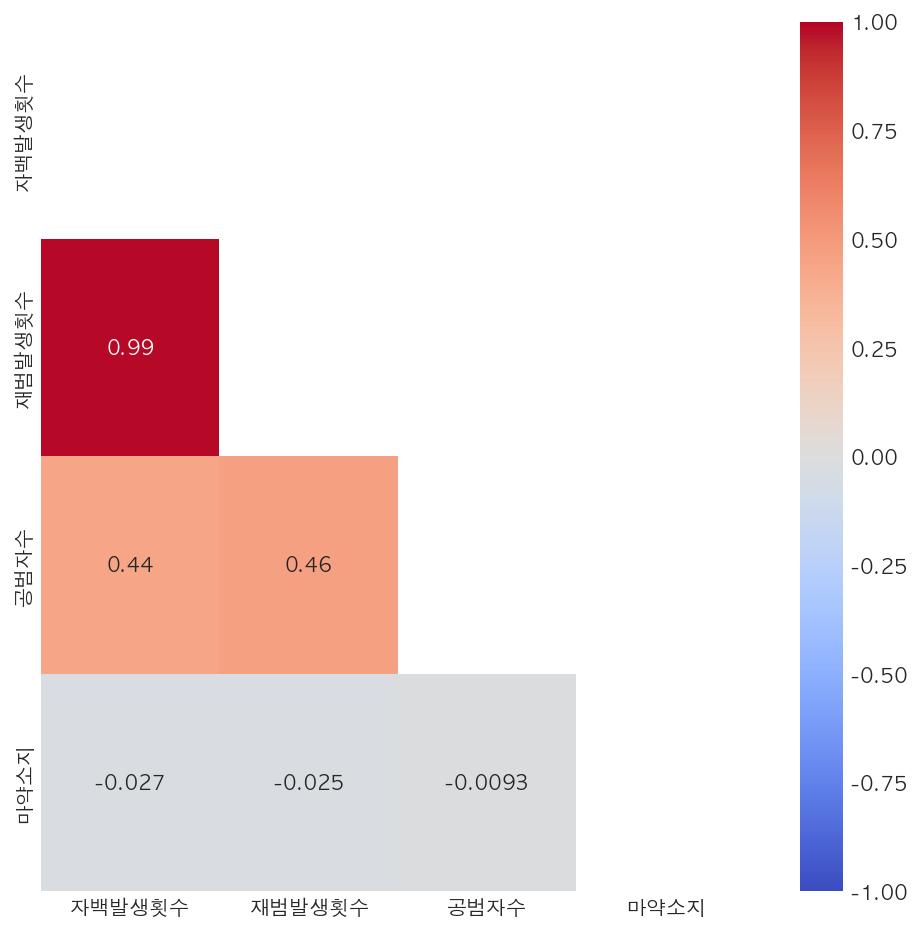

In [16]:
#상관관계 히트맵 이용해서 시각화
mask= np.triu(np.ones_like(corr))
plt.figure(figsize=(8,8))
_ = sns.heatmap(corr, cmap="coolwarm", annot=True, mask=mask, vmax=1, vmin=-1)

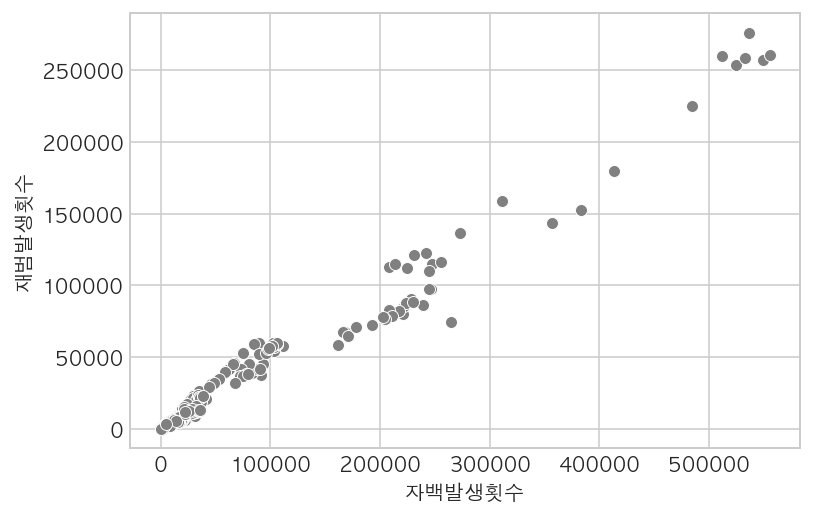

In [20]:
# 재범발생횟수와 자백방생횟수 산점도
_ = sns.scatterplot(data=df, x=df["자백발생횟수"], y=df["재범발생횟수"], color="grey")

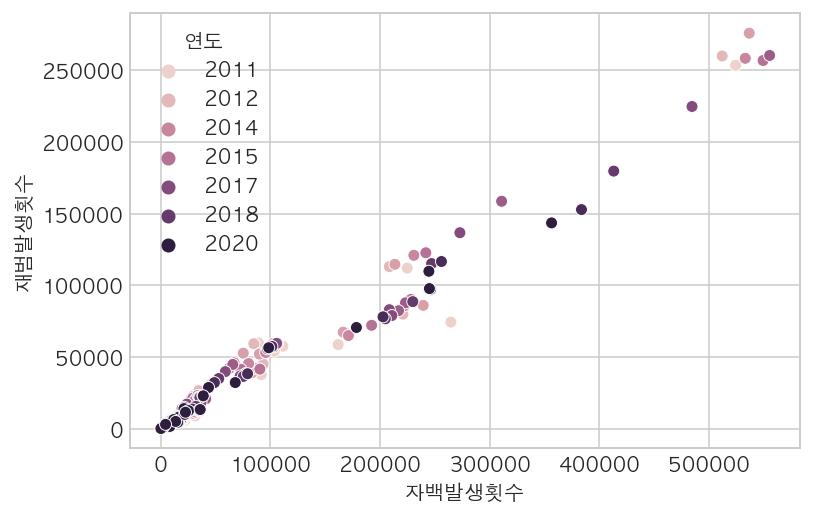

In [17]:
# 연도에 따른 재범발생횟수와 자백발생횟수의 산점도
_ = sns.scatterplot(data=df, x=df["자백발생횟수"], y=df["재범발생횟수"], hue=df["연도"])

In [52]:
_ = sns.plot(data=df, x=df["자백발생횟수"], y=df["재범발생횟수"], hue=df["연도"])
# sns.countplot(data=df, x=df["연도"], hue=df[["자백발생횟수", "재범발생횟수"]])

AttributeError: module 'seaborn' has no attribute 'plot'

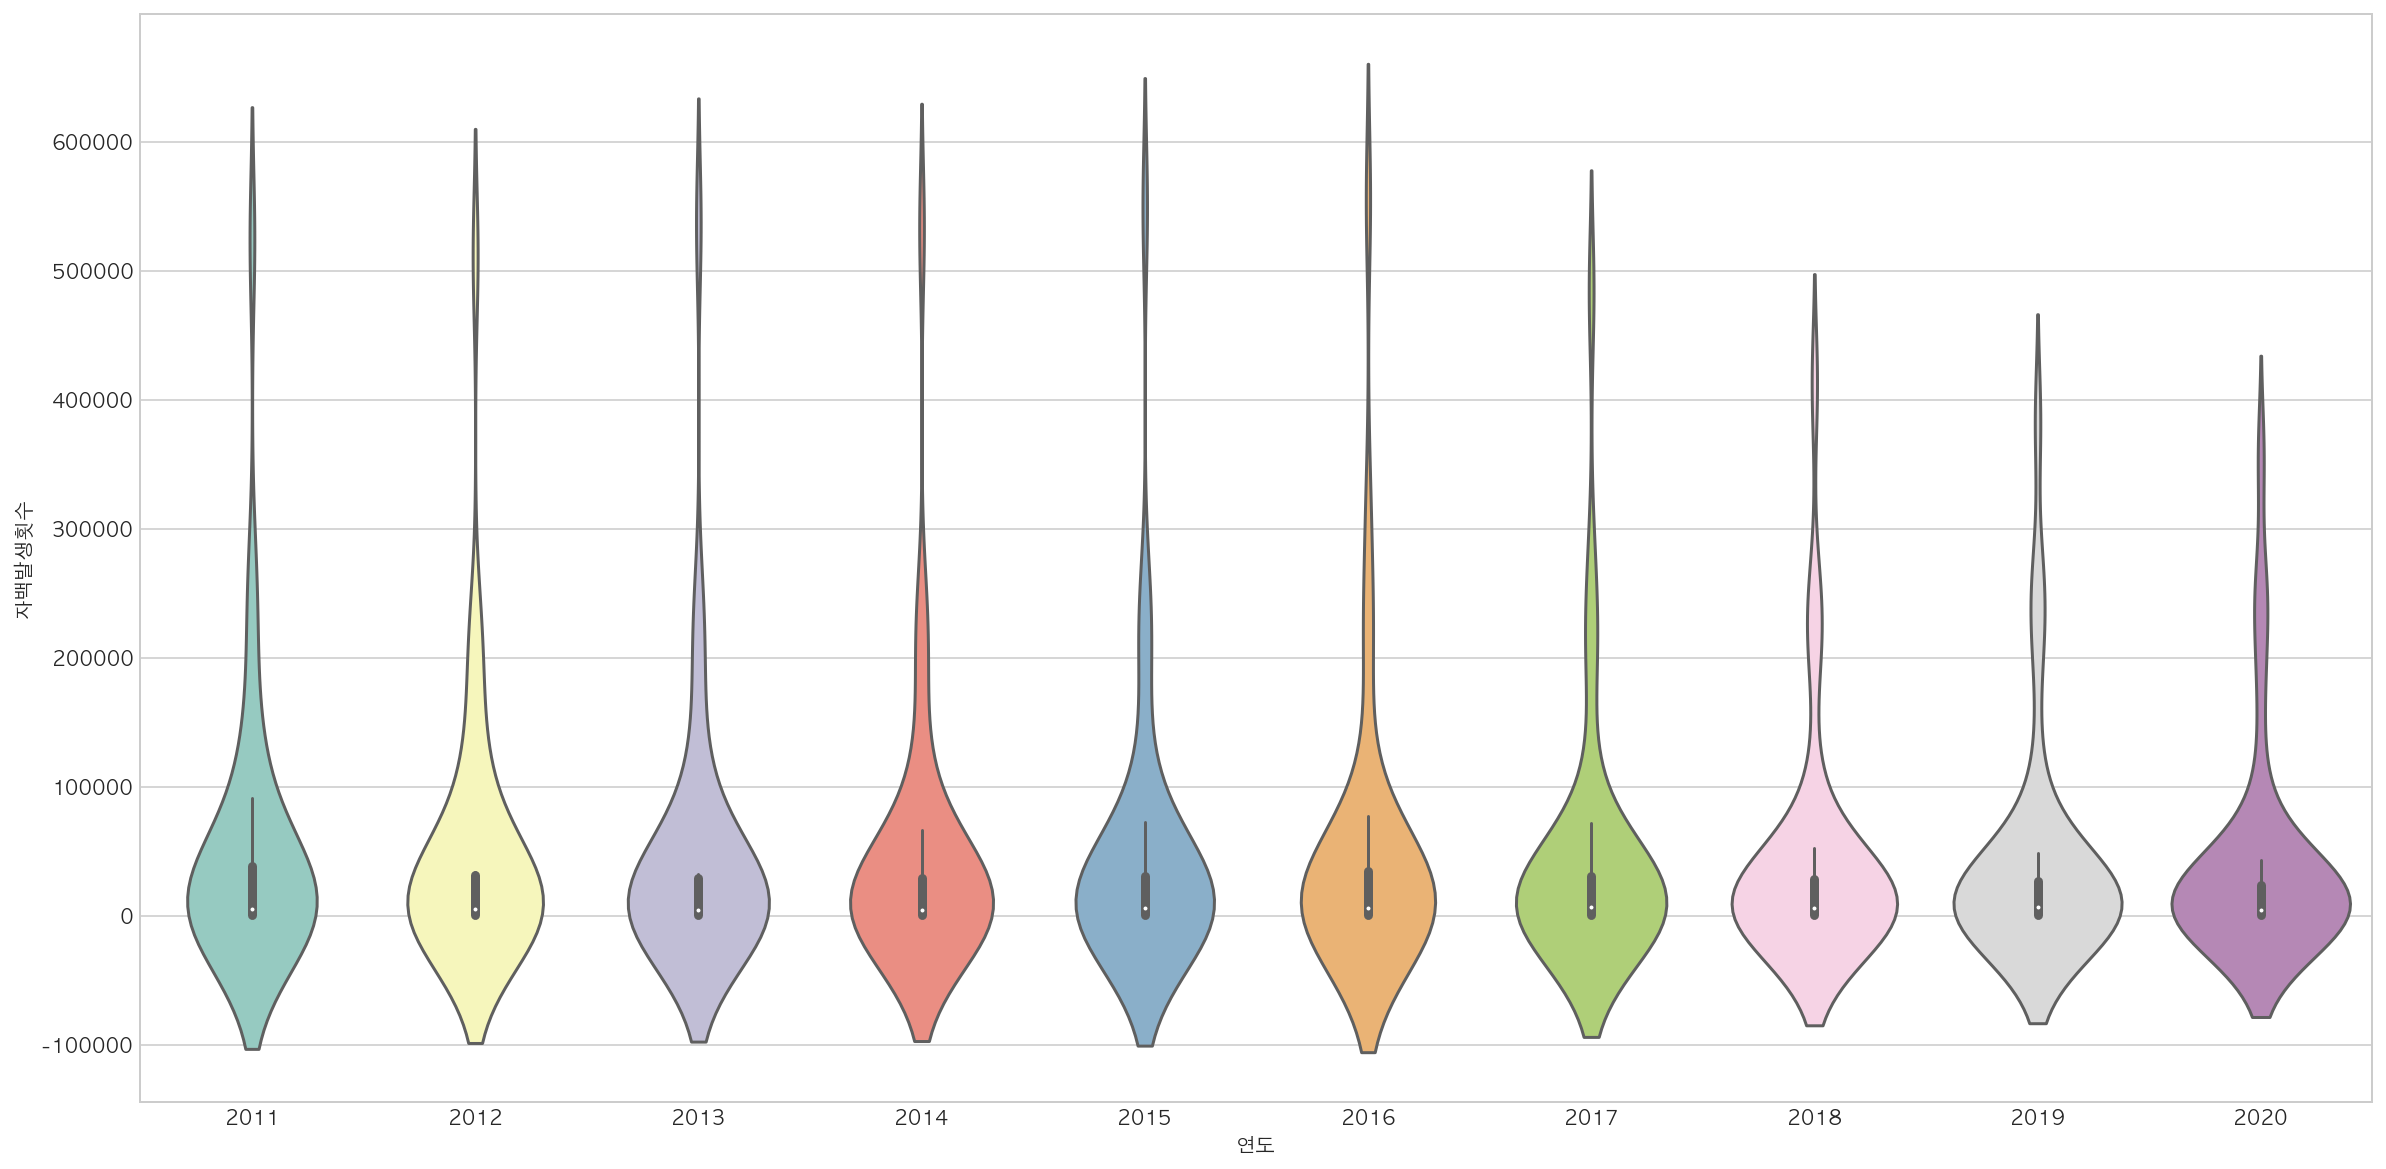

In [35]:
# 연도별 violin plot
# 연도별 자백발생횟수
plt.figure(figsize=(20, 10))
_ = sns.violinplot(data=df, x="연도", y="자백발생횟수", palette="Set3", title="연도별 자백발생횟수")

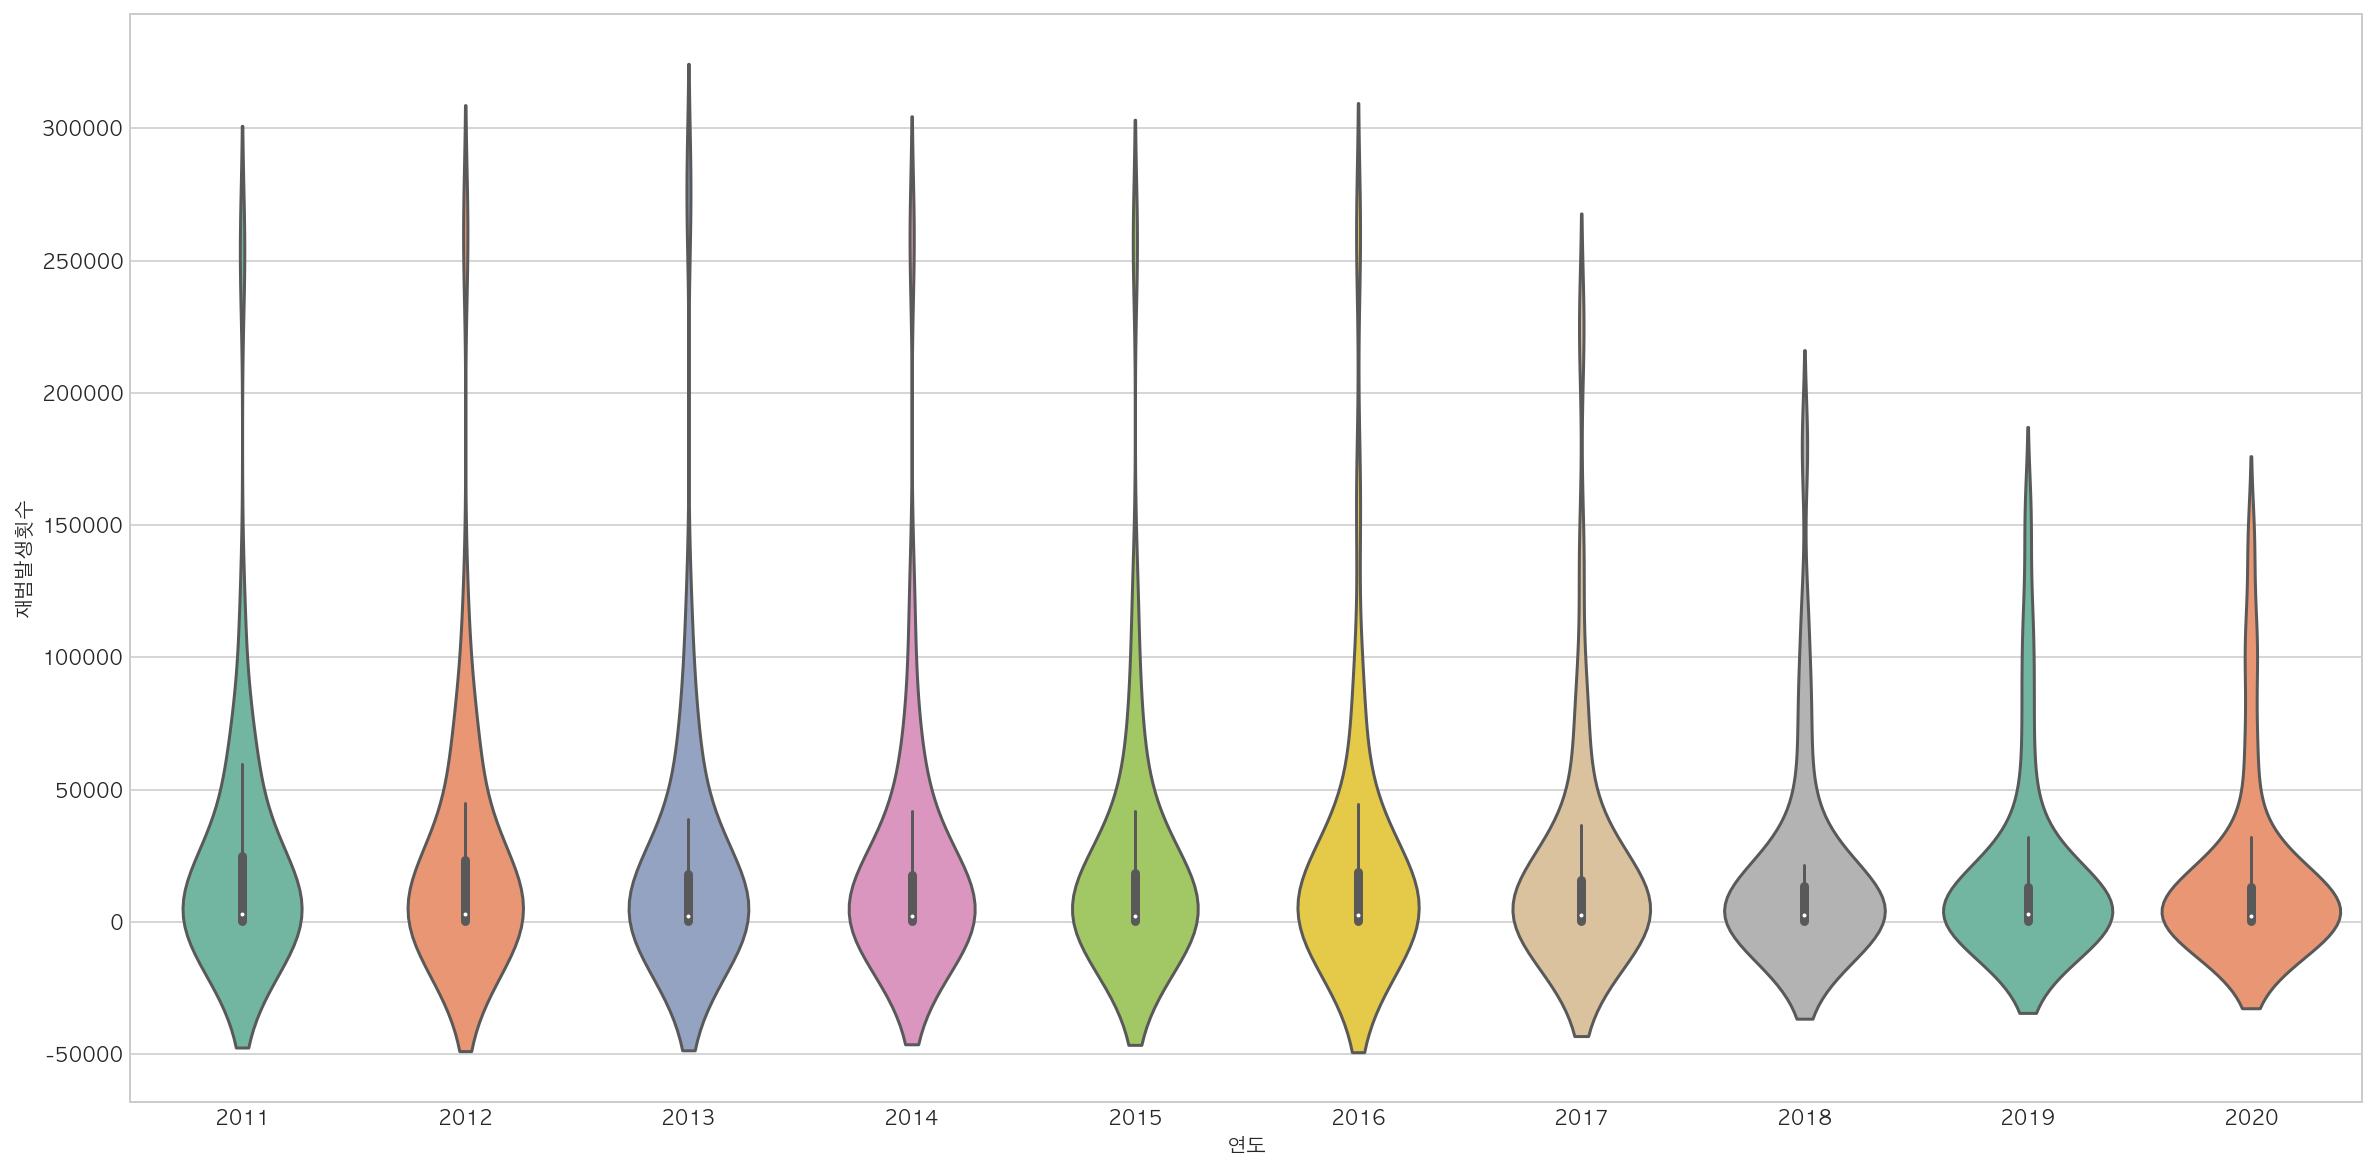

In [47]:
# 연도별 재범발생횟수
plt.figure(figsize=(20, 10))
_ = sns.violinplot(data=df, x="연도", y="재범발생횟수", palette="Set2", title="연도별  재범발생횟수")

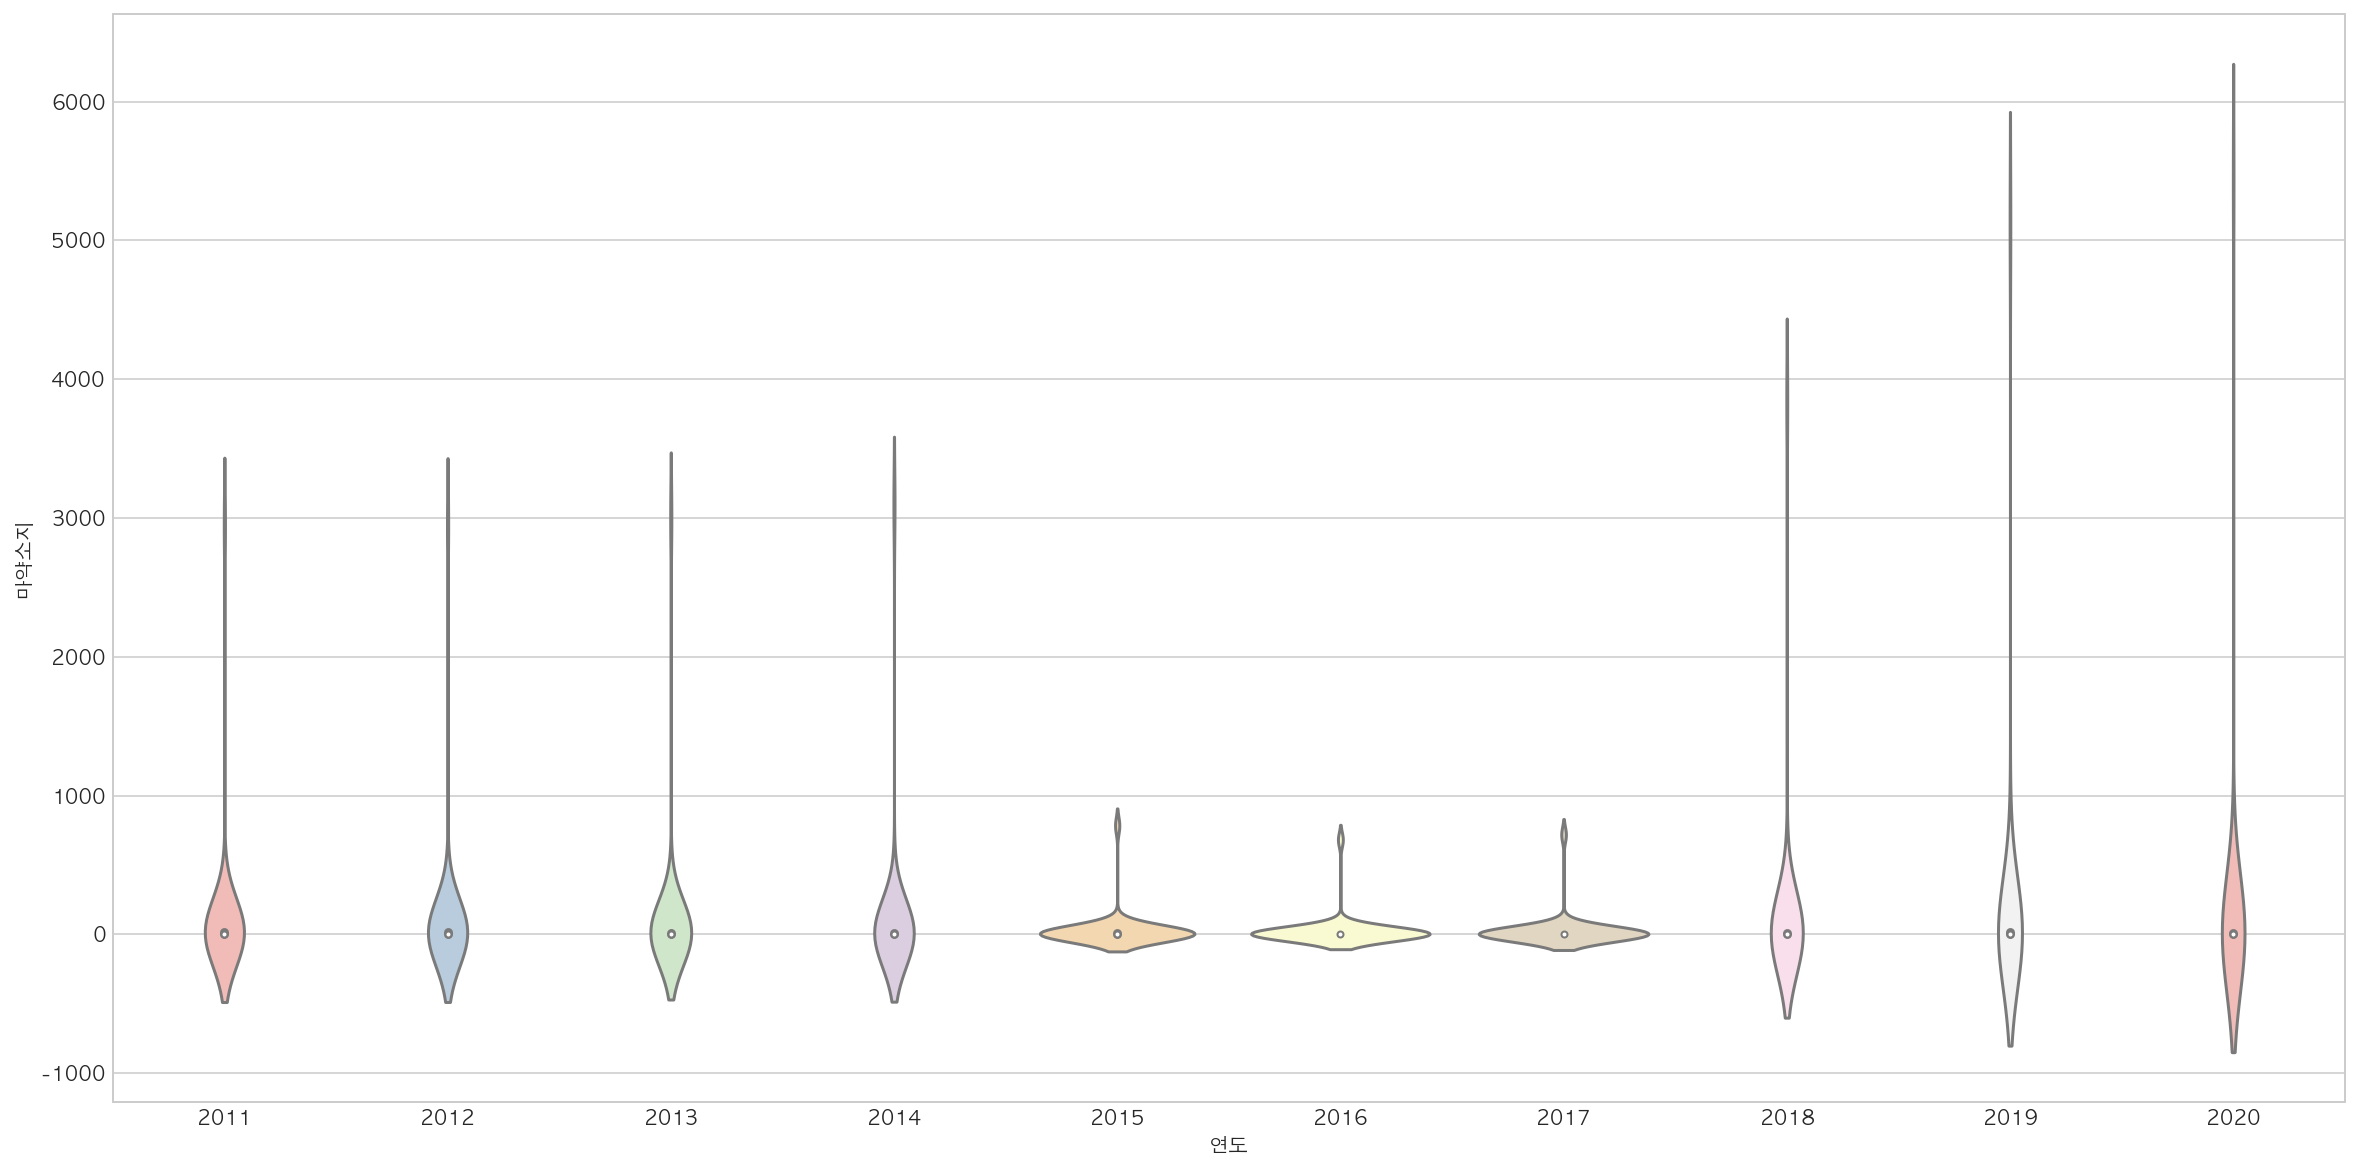

In [39]:
# 연도별 마약소지자수
plt.figure(figsize=(20, 10))
_ = sns.violinplot(data=df, x="연도", y="마약소지", palette="Pastel1", title="연도별 마약소지자수")

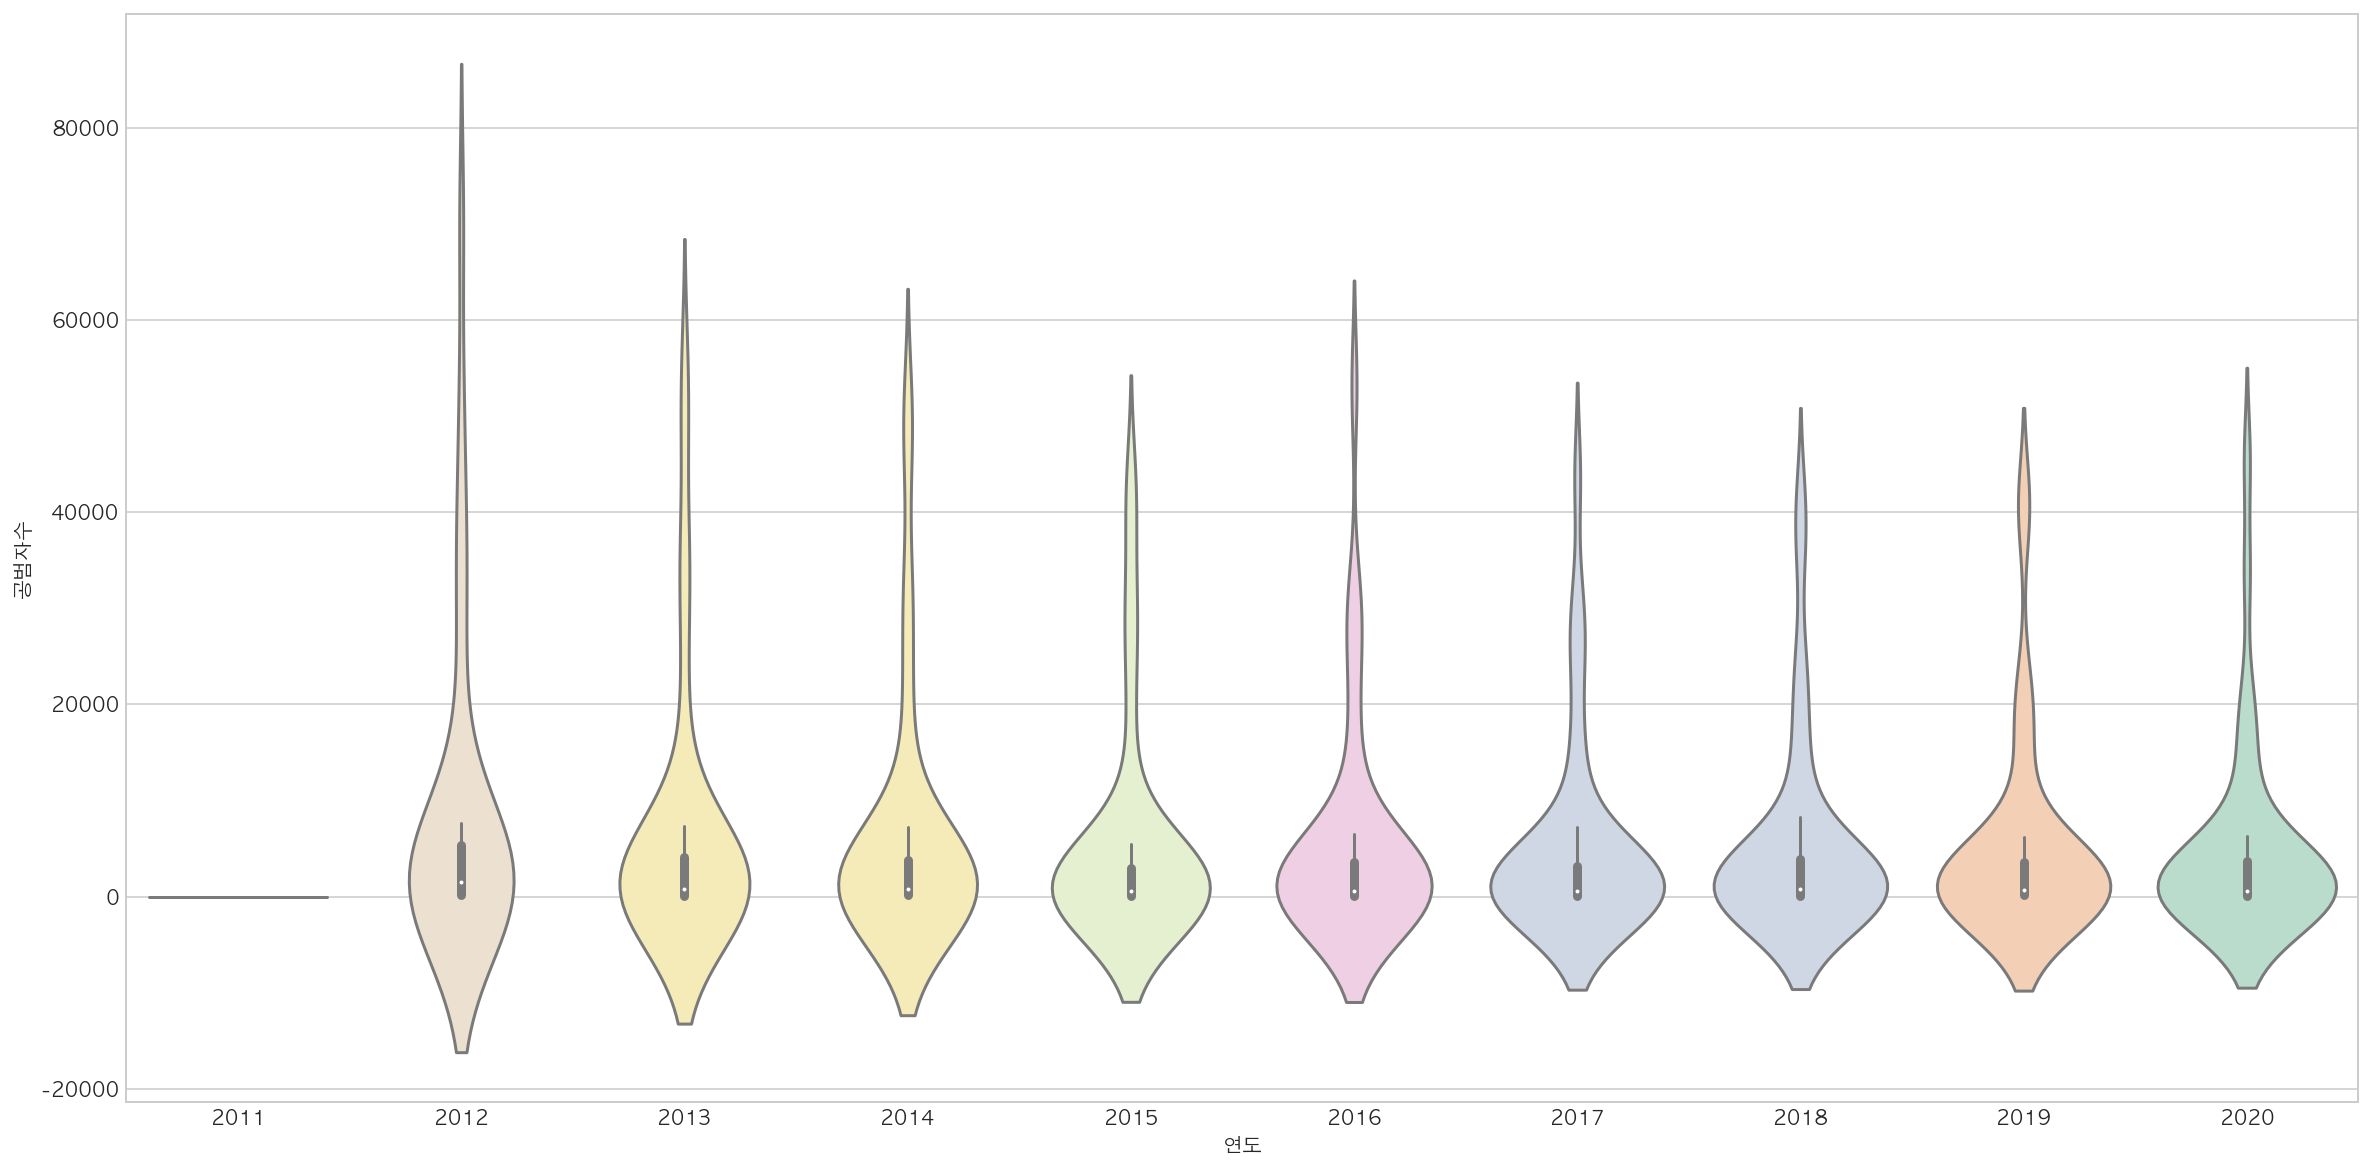

In [45]:
# 연도별 공범자수
plt.figure(figsize=(20, 10))
_ = sns.violinplot(data=df, x="연도", y="공범자수", palette = "Pastel2_r", title="연도별 평균 공범자수")